In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def data_generator(n_datapunkter: int = 3000, n_klasser: int = 3, n_dim: int = 2, støj: float = 0.9):
    for klasse in range(n_klasser):
        X_ = np.random.normal(klasse, støj, (n_datapunkter // n_klasser, n_dim))
        y_ = np.full(X_.shape[0], klasse)
        if klasse == 0:
            X = X_
            y = y_
        else:
            X = np.vstack([X, X_])
            y = np.hstack([y, y_])

    idx = np.random.permutation(X.shape[0])
    X, y = X[idx], y[idx]
    X_train, y_train = X[:int(0.6 * X.shape[0])], y[:int(0.6 * X.shape[0])]
    X_val, y_val = X[int(0.6 * X.shape[0]):int(0.8 * X.shape[0])], y[int(0.6 * X.shape[0]):int(0.8 * X.shape[0])]
    X_test, y_test = X[int(0.8 * X.shape[0]):], y[int(0.8 * X.shape[0]):]
    return X_train, y_train, X_val, y_val, X_test, y_test  

In [3]:
def plot_data(X: np.ndarray, y: np.ndarray, axs: plt.Axes = None):
    if axs is None:
        fig, axs = plt.subplots(1, 1, figsize=(5, 5))
    for klasse in np.unique(y):
        axs.scatter(X[y == klasse, 0], X[y == klasse, 1], label=f'Klasse {klasse}')
    axs.legend()

X_train, y_train, X_val, y_val, X_test, y_test = data_generator()

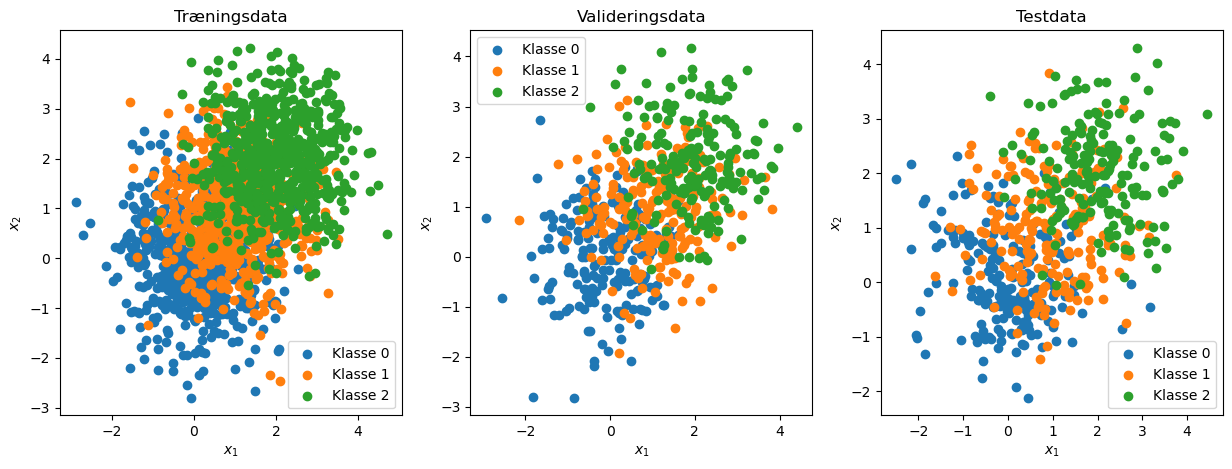

In [4]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, x, y in zip(range(3), [X_train, X_val, X_test], [y_train, y_val, y_test]):
    plot_data(x, y, ax[i])
    ax[i].set_title(['Træningsdata', 'Valideringsdata', 'Testdata'][i])
    ax[i].set_xlabel('$x_1$')
    ax[i].set_ylabel('$x_2$')
plt.show()

In [5]:
import sklearn
clf = sklearn.svm.SVC()

AttributeError: module 'sklearn' has no attribute 'svm'

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
sum(clf.predict(X_val) == y_val) / len(y_val)